# 6.0 Modelling - Prophet

---

# Contents

- [1.0 Arima Model](#1.0-ARIMA-Model)
- [2.0 Daily Data](#2.0-Daily-Data)
    - [1.1 Load Data](#2.1-Load-Data)
    - [1.2 Train Test Split](#2.2-Train-Test-Split)

In [1]:
# !pip install fbprophet

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import calendar

from fbprophet import Prophet

In [3]:
pd.set_option('display.max_columns', None)

---

# 1.0 Prophet Model

About Prophet


more about prophet

---

## 1.1 Load Data

In [73]:
daily = pd.read_csv('/Users/stuartdaw/Documents/Capstone_data/data/resampled/daily.csv', 
                    index_col='date', parse_dates=True)

In [74]:
daily_pattern = pd.read_csv('/Users/stuartdaw/Documents/Capstone_data/data/targets/daily_pattern.csv', 
                           parse_dates=True)

In [75]:
daily = daily[['close']]

In [64]:
daily.shape

(4921, 41)

In [65]:
daily.columns

Index(['ds', 'open', 'high', 'low', 'y', 'gold_usd', 'gold_euro', 'marubozu',
       'marubozu+1', 'marubozu-1', 'marubozu-2', 'height', 'av_3_height',
       'wk_mv_av', 'mnth_mv_av', 'qtr_mv_av', 'vol', 'day-1_open',
       'day-2_open', 'day-3_open', 'day-1_high', 'day-2_high', 'day-3_high',
       'day-1_low', 'day-2_low', 'day-3_low', 'day-1_close', 'day-2_close',
       'day-3_close', 'day+1_open', 'day+1_high', 'day+1_low', 'day+1_close',
       'day+2_high', 'day+3_high', 'day+4_high', 'day+5_high', 'date+5',
       'target', 'double_height', 'select'],
      dtype='object')

In [66]:
daily.reset_index(level=0, inplace=True)

In [67]:
daily.rename(columns={'date':'ds','close':'y'}, inplace=True)

In [68]:
daily.head()

,index,ds,open,high,low,y,gold_usd,gold_euro,marubozu,marubozu+1,marubozu-1,marubozu-2,height,av_3_height,wk_mv_av,mnth_mv_av,qtr_mv_av,vol,day-1_open,day-2_open,day-3_open,day-1_high,day-2_high,day-3_high,day-1_low,day-2_low,day-3_low,day-1_close,day-2_close,day-3_close,day+1_open,day+1_high,day+1_low,day+1_close,day+2_high,day+3_high,day+4_high,day+5_high,date+5,target,double_height,select
0,0,2000-11-13,0.8637,0.8667,0.8560,0.8594,92.0,125.6,0,0.0,0.0,1.0,-0.0043,0.001400,0.862243,0.855607,0.901238,0.010497,0.8668,0.8554,0.8616,0.8708,0.8679,0.8631,0.8591,0.8521,0.8522,0.8638,0.8669,0.8551,0.8593,0.8618,0.8549,0.8588,0.8634,0.8600,0.8579,0.8525,2000-11-20,0.8634,0.8551,0
1,1,2000-11-14,0.8593,0.8618,0.8549,0.8588,92.1,126.0,0,0.0,0.0,0.0,-0.0005,-0.002600,0.861214,0.854977,0.900643,0.002233,0.8637,0.8668,0.8554,0.8667,0.8708,0.8679,0.8560,0.8591,0.8521,0.8594,0.8638,0.8669,0.8589,0.8634,0.8553,0.8578,0.8600,0.8579,0.8525,0.8536,2000-11-21,0.8634,0.8583,0
2,2,2000-11-15,0.8589,0.8634,0.8553,0.8578,91.9,125.6,0,-1.0,0.0,0.0,-0.0011,-0.001967,0.860514,0.854417,0.899977,0.002414,0.8593,0.8637,0.8668,0.8618,0.8667,0.8708,0.8549,0.8560,0.8591,0.8588,0.8594,0.8638,0.8579,0.8600,0.8512,0.8529,0.8579,0.8525,0.8536,0.8486,2000-11-22,0.8600,0.8567,0
3,3,2000-11-16,0.8579,0.8600,0.8512,0.8529,92.7,127.4,-1,0.0,0.0,0.0,-0.0050,-0.002200,0.859243,0.853840,0.899322,0.002770,0.8589,0.8593,0.8637,0.8634,0.8618,0.8667,0.8553,0.8549,0.8560,0.8578,0.8588,0.8594,0.8530,0.8579,0.8475,0.8501,0.8525,0.8536,0.8486,0.8456,2000-11-23,0.8579,0.8479,0
4,4,2000-11-17,0.8530,0.8579,0.8475,0.8501,92.2,126.9,0,0.0,-1.0,0.0,-0.0029,-0.003000,0.858529,0.853183,0.898537,0.002276,0.8579,0.8589,0.8593,0.8600,0.8634,0.8618,0.8512,0.8553,0.8549,0.8529,0.8578,0.8588,0.8502,0.8525,0.8465,0.8515,0.8536,0.8486,0.8456,0.8454,2000-11-24,0.8536,0.8472,0


In [69]:
daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4921 entries, 0 to 4920
Data columns (total 42 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   index          4921 non-null   int64         
 1   ds             4921 non-null   datetime64[ns]
 2   open           4921 non-null   float64       
 3   high           4921 non-null   float64       
 4   low            4921 non-null   float64       
 5   y              4921 non-null   float64       
 6   gold_usd       4921 non-null   float64       
 7   gold_euro      4921 non-null   float64       
 8   marubozu       4921 non-null   int64         
 9   marubozu+1     4921 non-null   float64       
 10  marubozu-1     4921 non-null   float64       
 11  marubozu-2     4921 non-null   float64       
 12  height         4921 non-null   float64       
 13  av_3_height    4921 non-null   float64       
 14  wk_mv_av       4921 non-null   float64       
 15  mnth_mv_av     4921 n

In [71]:
m = Prophet()

In [72]:
m.fit(daily)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [15]:
future = m.make_future_dataframe(periods=30, freq='B')

In [16]:
future

,ds
0,2000-11-13
1,2000-11-14
2,2000-11-15
3,2000-11-16
4,2000-11-17
...,...
4946,2020-01-29
4947,2020-01-30
4948,2020-01-31
4949,2020-02-03


In [17]:
forecast = m.predict(future)

In [18]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2000-11-13,0.884984,0.844971,0.934344,0.884984,0.884984,0.003518,0.003518,0.003518,0.006807,0.006807,0.006807,-0.003289,-0.003289,-0.003289,0.0,0.0,0.0,0.888502
1,2000-11-14,0.884985,0.842633,0.936649,0.884985,0.884985,0.003616,0.003616,0.003616,0.007189,0.007189,0.007189,-0.003573,-0.003573,-0.003573,0.0,0.0,0.0,0.888601
2,2000-11-15,0.884987,0.840221,0.936032,0.884987,0.884987,0.003648,0.003648,0.003648,0.007438,0.007438,0.007438,-0.003790,-0.003790,-0.003790,0.0,0.0,0.0,0.888635
3,2000-11-16,0.884989,0.842086,0.930788,0.884989,0.884989,0.003405,0.003405,0.003405,0.007342,0.007342,0.007342,-0.003937,-0.003937,-0.003937,0.0,0.0,0.0,0.888393
4,2000-11-17,0.884990,0.840666,0.935076,0.884990,0.884990,0.003235,0.003235,0.003235,0.007248,0.007248,0.007248,-0.004013,-0.004013,-0.004013,0.0,0.0,0.0,0.888225


In [19]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [20]:
forecast[['ds','yhat_lower','yhat_upper','yhat']]

,ds,yhat_lower,yhat_upper,yhat
0,2000-11-13,0.844971,0.934344,0.888502
1,2000-11-14,0.842633,0.936649,0.888601
2,2000-11-15,0.840221,0.936032,0.888635
3,2000-11-16,0.842086,0.930788,0.888393
4,2000-11-17,0.840666,0.935076,0.888225
...,...,...,...,...
4946,2020-01-29,1.108161,1.203644,1.156272
4947,2020-01-30,1.109258,1.204467,1.156169
4948,2020-01-31,1.111945,1.204688,1.156072
4949,2020-02-03,1.104945,1.204578,1.155586


In [21]:
forecast[-150:-1]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
4801,2019-07-10,1.140941,1.103186,1.190556,1.140941,1.140941,0.003576,0.003576,0.003576,0.007438,0.007438,0.007438,-0.003862,-0.003862,-0.003862,0.0,0.0,0.0,1.144518
4802,2019-07-11,1.140968,1.097841,1.192814,1.140968,1.140968,0.003820,0.003820,0.003820,0.007342,0.007342,0.007342,-0.003522,-0.003522,-0.003522,0.0,0.0,0.0,1.144788
4803,2019-07-12,1.140994,1.097368,1.190106,1.140994,1.140994,0.004064,0.004064,0.004064,0.007248,0.007248,0.007248,-0.003184,-0.003184,-0.003184,0.0,0.0,0.0,1.145057
4804,2019-07-15,1.141072,1.098929,1.193421,1.141072,1.141072,0.004611,0.004611,0.004611,0.006807,0.006807,0.006807,-0.002196,-0.002196,-0.002196,0.0,0.0,0.0,1.145683
4805,2019-07-16,1.141098,1.099605,1.189919,1.141098,1.141098,0.005311,0.005311,0.005311,0.007189,0.007189,0.007189,-0.001878,-0.001878,-0.001878,0.0,0.0,0.0,1.146409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4945,2020-01-28,1.146195,1.111183,1.203243,1.146195,1.146195,0.009844,0.009844,0.009844,0.007189,0.007189,0.007189,0.002655,0.002655,0.002655,0.0,0.0,0.0,1.156039
4946,2020-01-29,1.146221,1.108161,1.203644,1.146221,1.146221,0.010051,0.010051,0.010051,0.007438,0.007438,0.007438,0.002613,0.002613,0.002613,0.0,0.0,0.0,1.156272
4947,2020-01-30,1.146247,1.109258,1.204467,1.146247,1.146247,0.009922,0.009922,0.009922,0.007342,0.007342,0.007342,0.002580,0.002580,0.002580,0.0,0.0,0.0,1.156169
4948,2020-01-31,1.146273,1.111945,1.204688,1.146273,1.146273,0.009799,0.009799,0.009799,0.007248,0.007248,0.007248,0.002552,0.002552,0.002552,0.0,0.0,0.0,1.156072


In [22]:
forecast['ds']= pd.to_datetime(forecast['ds'])

In [23]:
pd.plotting.register_matplotlib_converters()

(733773.0, 737466.0)

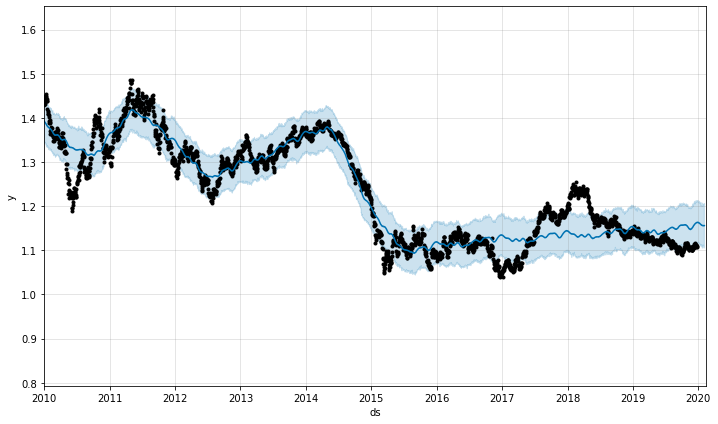

In [24]:
m.plot(forecast);
plt.xlim('2010-01-01','2020-02-11')

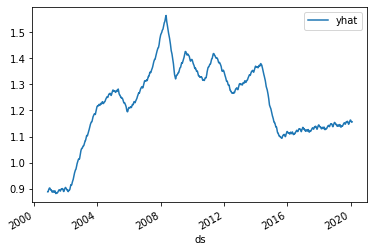

In [25]:
forecast.plot(x='ds', y='yhat')

---

## 1.2 Train Test Split

In [26]:
# Test 1 date out
daily.loc[daily['ds'] == daily_pattern.loc[10]['pattern_end']].index[0]

1027

In [27]:
daily.head()

,ds,y
0,2000-11-13,0.8594
1,2000-11-14,0.8588
2,2000-11-15,0.8578
3,2000-11-16,0.8529
4,2000-11-17,0.8501


In [28]:
daily.loc[daily['ds'] <= '2004-01-28 00:00:00']

,ds,y
0,2000-11-13,0.8594
1,2000-11-14,0.8588
2,2000-11-15,0.8578
3,2000-11-16,0.8529
4,2000-11-17,0.8501
...,...,...
772,2004-01-22,1.2707
773,2004-01-23,1.2587
774,2004-01-26,1.2464
775,2004-01-27,1.2597


In [29]:
train_test = daily.loc[daily['ds'] <= '2004-2-28 00:00:00']

In [30]:
train_test

,ds,y
0,2000-11-13,0.8594
1,2000-11-14,0.8588
2,2000-11-15,0.8578
3,2000-11-16,0.8529
4,2000-11-17,0.8501
...,...,...
794,2004-02-23,1.2531
795,2004-02-24,1.2679
796,2004-02-25,1.2513
797,2004-02-26,1.2439


In [78]:
# Set for testing
train = train_test.iloc[:777]
test = train_test.iloc[777:]

In [79]:
start=len(train)
end=len(train)+len(test)-1
start, end

(777, 798)

In [80]:
def train_test_plot(train, test):
    plt.figure(figsize=(16, 8))
    plt.plot(train, c='blue')
    plt.plot(test, c='orange');

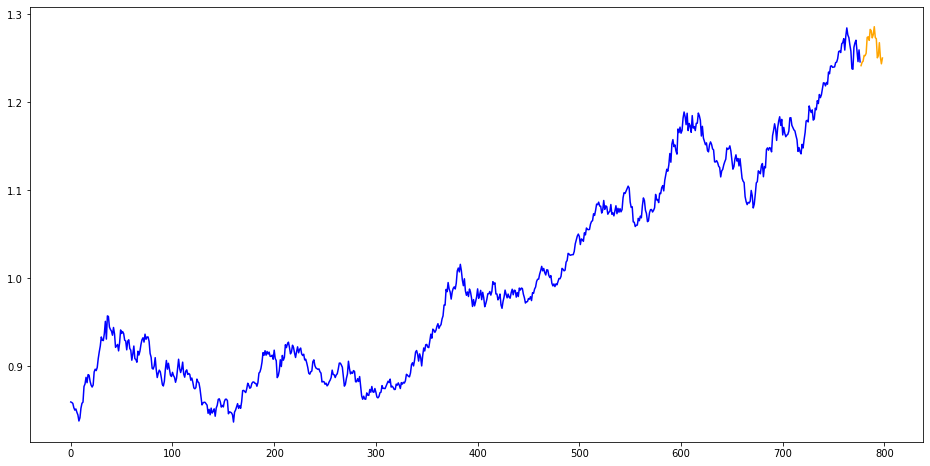

In [86]:
# This plot confirms that our train test split makes sense
train_test_plot(train['y'], test['y'])

In [82]:
## Create model

In [36]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=30, freq='B')
forecast = m.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [37]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2000-11-13,0.862709,0.837682,0.865600,0.862709,0.862709,-0.011889,-0.011889,-0.011889,0.000744,0.000744,0.000744,-0.012632,-0.012632,-0.012632,0.0,0.0,0.0,0.850820
1,2000-11-14,0.862983,0.839470,0.867209,0.862983,0.862983,-0.010012,-0.010012,-0.010012,0.001943,0.001943,0.001943,-0.011955,-0.011955,-0.011955,0.0,0.0,0.0,0.852971
2,2000-11-15,0.863257,0.838829,0.868149,0.863257,0.863257,-0.010038,-0.010038,-0.010038,0.001259,0.001259,0.001259,-0.011297,-0.011297,-0.011297,0.0,0.0,0.0,0.853219
3,2000-11-16,0.863532,0.840416,0.868687,0.863532,0.863532,-0.009270,-0.009270,-0.009270,0.001387,0.001387,0.001387,-0.010657,-0.010657,-0.010657,0.0,0.0,0.0,0.854262
4,2000-11-17,0.863806,0.840775,0.869002,0.863806,0.863806,-0.008121,-0.008121,-0.008121,0.001907,0.001907,0.001907,-0.010028,-0.010028,-0.010028,0.0,0.0,0.0,0.855685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,2004-04-05,1.235232,1.217252,1.258704,1.223088,1.247164,0.003322,0.003322,0.003322,0.000744,0.000744,0.000744,0.002578,0.002578,0.002578,0.0,0.0,0.0,1.238554
825,2004-04-06,1.235535,1.219397,1.260026,1.223218,1.248139,0.004156,0.004156,0.004156,0.001943,0.001943,0.001943,0.002213,0.002213,0.002213,0.0,0.0,0.0,1.239691
826,2004-04-07,1.235837,1.218553,1.260525,1.223148,1.249040,0.003186,0.003186,0.003186,0.001259,0.001259,0.001259,0.001927,0.001927,0.001927,0.0,0.0,0.0,1.239023
827,2004-04-08,1.236139,1.219612,1.259636,1.222875,1.250095,0.003105,0.003105,0.003105,0.001387,0.001387,0.001387,0.001719,0.001719,0.001719,0.0,0.0,0.0,1.239245


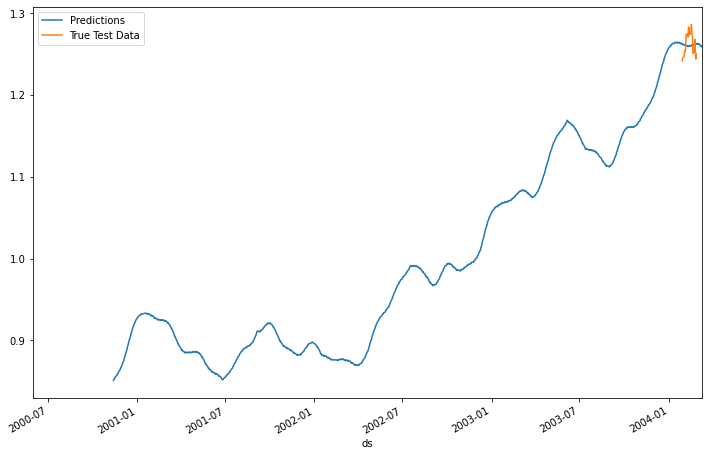

In [88]:
ax = forecast.plot(x='ds',y='yhat',label='Predictions', legend=True, figsize=(12,8), )
test.plot(x='ds', y='y', label='True Test Data', legend=True, ax=ax, xlim=('2000-05-30','2004-03-10'))


In [39]:
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [40]:
# 896, 917

In [41]:
# initial

initial = 1.01 * 365
initial = str(initial) + ' days'

initial

'368.65 days'

In [42]:
# period
period = 1.01 * 365
period = str(period) + ' days'
period

'368.65 days'

In [43]:
# horizon
horizon = 1.01 *365
horizon = str(horizon) + ' days'
horizon

'368.65 days'

In [44]:
daily_cv = cross_validation(m, initial=initial, period=period, horizon=horizon)

INFO:fbprophet:Making 2 forecasts with cutoffs between 2002-02-19 16:48:00 and 2003-02-23 08:24:00


In [45]:
daily_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2002-02-20,0.864822,0.854276,0.875030,0.8709,2002-02-19 16:48:00
1,2002-02-21,0.865266,0.854717,0.875605,0.8704,2002-02-19 16:48:00
2,2002-02-22,0.866849,0.856435,0.876540,0.8747,2002-02-19 16:48:00
3,2002-02-25,0.866560,0.856604,0.876460,0.8704,2002-02-19 16:48:00
4,2002-02-26,0.867534,0.857385,0.877656,0.8650,2002-02-19 16:48:00
...,...,...,...,...,...,...
497,2004-02-23,1.354005,0.886458,1.832277,1.2531,2003-02-23 08:24:00
498,2004-02-24,1.355945,0.890376,1.830369,1.2679,2003-02-23 08:24:00
499,2004-02-25,1.356945,0.883223,1.838227,1.2513,2003-02-23 08:24:00
500,2004-02-26,1.358649,0.885050,1.829767,1.2439,2003-02-23 08:24:00


In [46]:
performance_metrics(daily_cv)

,horizon,mse,rmse,mae,mape,mdape,coverage
0,37 days 07:12:00,0.000577,0.024020,0.019244,0.019889,0.015903,0.40
1,37 days 15:36:00,0.000589,0.024266,0.019625,0.020216,0.017276,0.38
2,38 days 15:36:00,0.000606,0.024610,0.020082,0.020643,0.018005,0.36
3,39 days 15:36:00,0.000638,0.025249,0.020785,0.021281,0.018670,0.34
4,40 days 07:12:00,0.000682,0.026109,0.021495,0.022143,0.019634,0.34
...,...,...,...,...,...,...,...
448,365 days 15:36:00,0.039035,0.197573,0.173928,0.155912,0.150799,0.50
449,366 days 07:12:00,0.039349,0.198366,0.174556,0.156460,0.153347,0.50
450,366 days 15:36:00,0.039472,0.198675,0.175251,0.157031,0.154957,0.50
451,367 days 15:36:00,0.039640,0.199098,0.176166,0.157789,0.158868,0.50


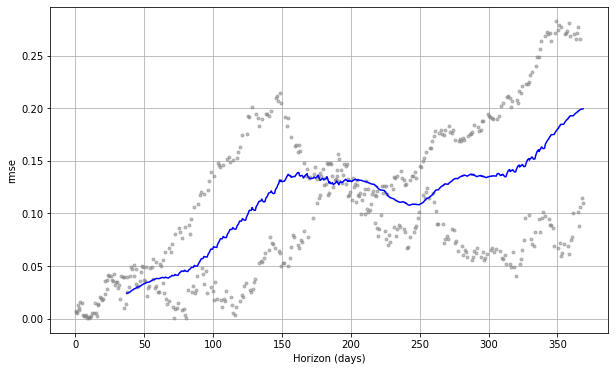

In [47]:
plot_cross_validation_metric(daily_cv, metric='rmse');

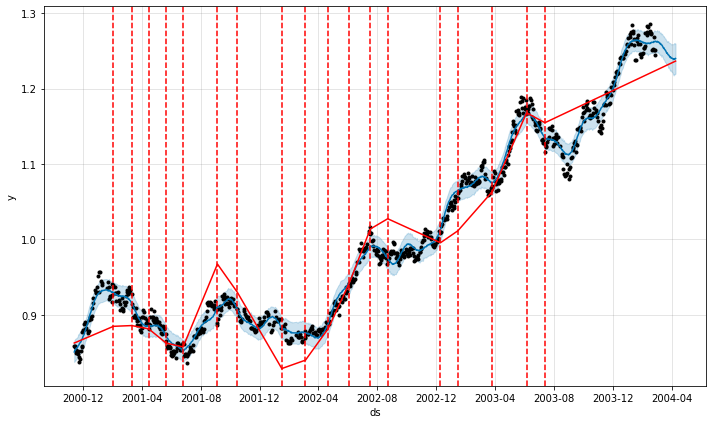

In [48]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)